In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('E:\python\datasets\Stocks\BAC.csv')

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3523.000000,3523.000000,3523.000000,3523.000000,3523.000000,3.523000e+03
mean,22.957905,23.220247,22.669631,22.938135,19.851501,1.174800e+08
std,13.409170,13.492552,13.321380,13.410517,10.426581,1.130062e+08
min,3.220000,3.510000,2.530000,3.140000,2.759305,4.835400e+06
25%,13.620000,13.790000,13.395000,13.560000,12.181610,5.063375e+07
50%,16.980000,17.150000,16.760000,16.950001,15.180848,8.519980e+07
75%,29.915000,30.185001,29.540001,29.875000,28.225653,1.468264e+08
max,55.040001,55.080002,54.820000,54.900002,42.099216,1.226791e+09


In [14]:
df.isnull().sum()

# No missing values here

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Trend

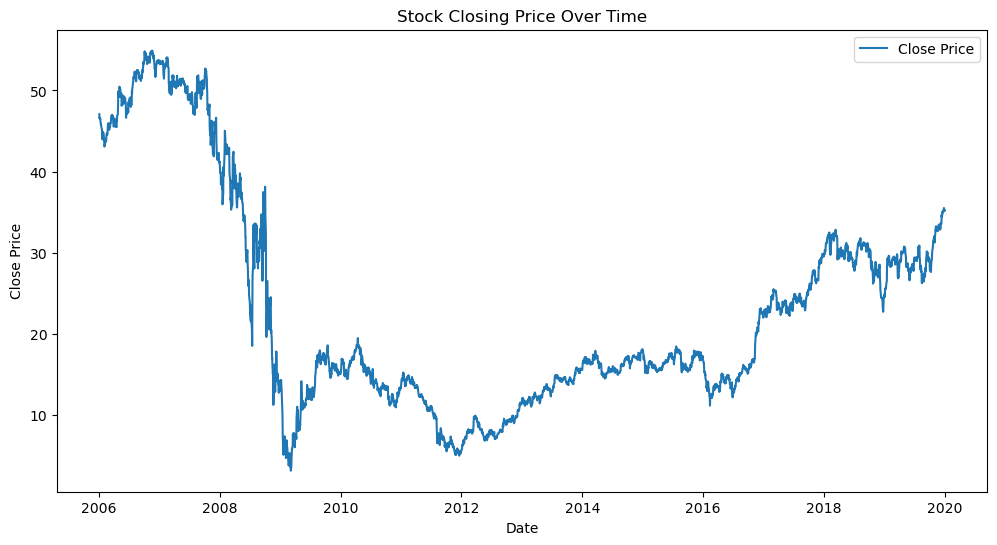

In [12]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

#closing prices over time
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Moving Averages

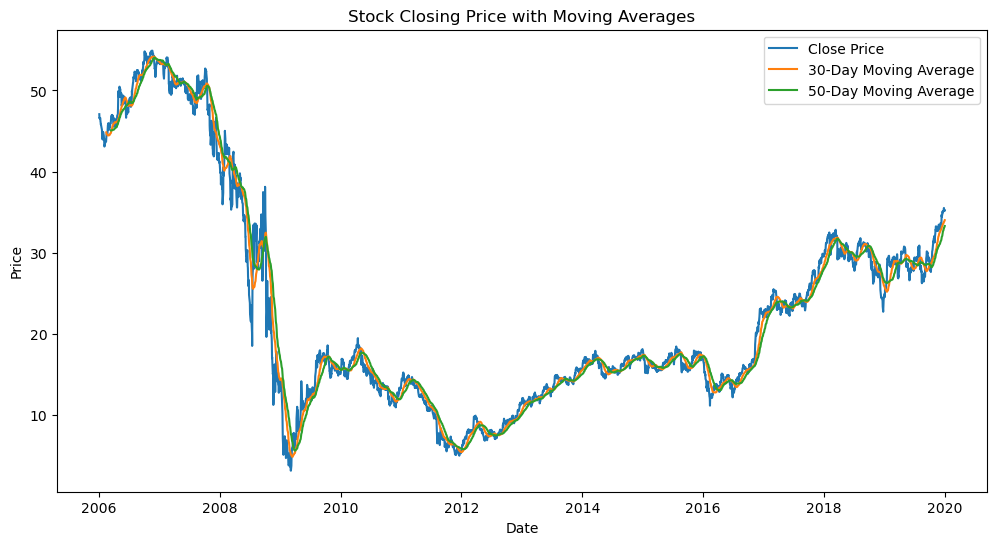

In [28]:
df['30_day_MA'] = df['Close'].rolling(window=30).mean()
df['50_day_MA'] = df['Close'].rolling(window=50).mean()

# Plot moving averages
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['30_day_MA'], label='30-Day Moving Average')
plt.plot(df['50_day_MA'], label='50-Day Moving Average')
plt.title('Stock Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Monthly returns

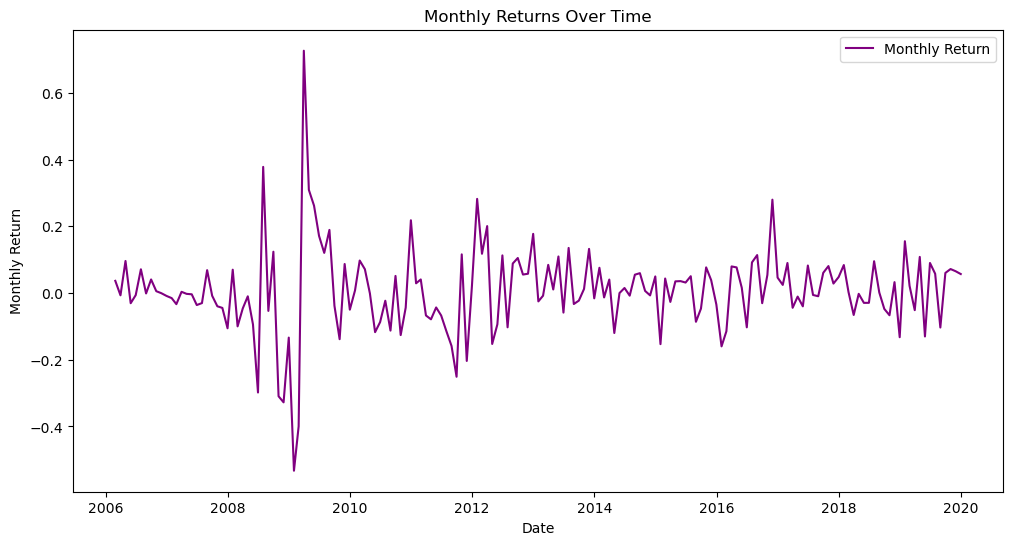

In [39]:
monthly_data = df['Close'].resample('M').last()

monthly_returns = monthly_data.pct_change()

plt.figure(figsize=(12,6))
plt.plot(monthly_returns, label='Monthly Return', color='purple')
plt.title('Monthly Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.legend()
plt.show()

# Volatility

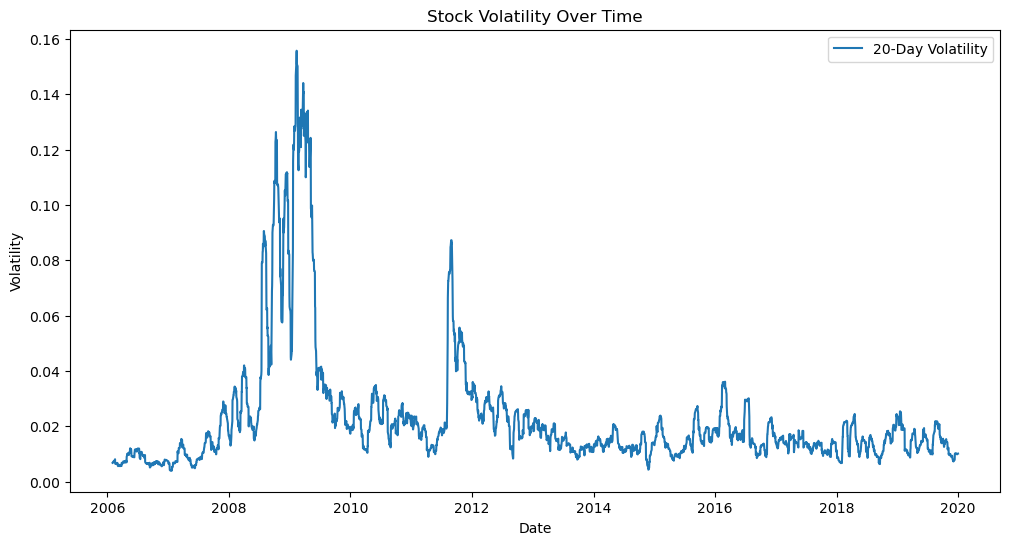

In [34]:
# Standard Deviation
df['20_day_volatility'] = df['Daily_Return'].rolling(window=20).std()

plt.figure(figsize=(12,6))
plt.plot(df['20_day_volatility'], label='20-Day Volatility')
plt.title('Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


# Correlation matrix

In [37]:
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
correlation_matrix

,Open,High,Low,Close,Volume
Open,1.000000,0.999637,0.999602,0.999342,-0.573934
High,0.999637,1.000000,0.999276,0.999618,-0.569190
Low,0.999602,0.999276,1.000000,0.999634,-0.579531
Close,0.999342,0.999618,0.999634,1.000000,-0.574395
Volume,-0.573934,-0.569190,-0.579531,-0.574395,1.000000
